In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json
import ast

from loguru import logger

In [2]:
with open("./final_cleaned_output.json", "r") as f:
    in_data = json.load(f)

with open("./external_model_name.json", "r") as f:
    ex_data = json.load(f)

In [102]:
# Initialize an empty dictionary to store patterns
in_patterns = {}
cat_all = []
conf_all = []

# Iterate over the data
for model, info in in_data.items():
    print(info)
    categories = []
    confidences = []
    # Get the tuples
    for component in info:
        # Get the top1 category and conf
        try:
            cat = info[component][0][0]
            conf = info[component][0][1]
        except:
            # logger.warning("No category found for {}".format(model)) 
            # logger.debug(f"model components: {components}")
            continue
        categories.append(cat)
        confidences.append(conf)    
    cat_all.append(categories)
    conf_all.append(confidences)
    # Generate a pattern based on categories
    pattern = "-".join(categories)
    
    if pattern not in in_patterns:
        in_patterns[pattern] = 0
    
    # Count the frequency of each pattern
    in_patterns[pattern] += 1

{'marathi': [['L', 1.0], ['O', 0.2], ['T', 0.1]], 'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'large': [['S', 0.9], ['O', 0.2], ['V', 0.2]], 'urdu': [['L', 1.0], ['O', 0.2], ['T', 0.1]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'large': [['S', 0.9], ['O', 0.2], ['V', 0.2]], 'v1': [['V', 0.9], ['S', 0.2], ['O', 0.2]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'base': [['S', 0.9], ['O', 0.2], ['V', 0.2]], 'v1': [['V', 0.9], ['S', 0.2], ['O', 0.2]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'xxlarge': [['S', 0.9], ['O', 0.2], ['V', 0.2]], 'v1': [['V', 0.9], ['S', 0.2], ['O', 0.2]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'xxlarge': [['S', 0.9], ['O', 0.2], ['V', 0.2]], 'v2': [['V', 0.9], ['S', 0.2], ['O', 0.2]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'base': [['S', 0.9], ['O', 0.2], ['V', 0.2]], 'arabic': [['L', 1.0], ['O', 0.2], ['T', 0.1]]}
{'albert': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'xlar

In [104]:
# Initialize an empty dictionary to store patterns
ex_patterns = {}
cat_all = []
conf_all = []

# Iterate over the data
for model, info in ex_data.items():
    print(info)
    categories = []
    confidences = []
    # Get the tuples
    for component in info:
        # Get the top1 category and conf
        try:
            cat = info[component][0][0]
            conf = info[component][0][1]
        except:
            # logger.warning("No category found for {}".format(model)) 
            # logger.debug(f"model components: {components}")
            continue
        categories.append(cat)
        confidences.append(conf)    
    cat_all.append(categories)
    conf_all.append(confidences)
    # Generate a pattern based on categories
    pattern = "-".join(categories)
    
    if pattern not in ex_patterns:
        ex_patterns[pattern] = 0
    
    # Count the frequency of each pattern
    ex_patterns[pattern] += 1

{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'v2': [['V', 0.9], ['S', 0.2], ['O', 0.2]], '12': [['N', 0.9], ['S', 0.6], ['O', 0.1]], 'qdq': [['O', 1.0], None, None]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'v2': [['V', 0.9], ['S', 0.2], ['O', 0.2]], '12': [['N', 0.9], ['S', 0.6], ['O', 0.1]], 'int8': [['O', 1.0], None, None]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], '3': [['S', 0.9], ['N', 0.6], ['O', 0.1]]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], '6': [['S', 0.9], ['N', 0.6], ['O', 0.1]]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], '8': [['S', 0.9], ['N', 0.6], ['O', 0.1]]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], '9': [['S', 0.9], ['N', 0.6], ['O', 0.1]]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], '7': [['S', 0.9], ['N', 0.6], ['O', 0.1]]}
{'shufflenet': [['A', 1.0], ['O', 0.1], ['L', 0.1]], 'v2': [['V', 0.9], ['S', 0.2], ['O', 0.2]], '12': [['N', 0.9], ['S', 0.6], ['O', 0.1]]}
{'shufflenet': [['A', 1.0], ['

['A-S-C-F-D' 'A-S-C-F-T' 'A-S-L' 'A-F-T' 'A-S-D' 'A-S-F-D' 'A-F-D'
 'A-A-S-F-D-L' 'O' 'A-S' 'A' 'A-T' 'A-D' 'A-S-T' 'A-S-L-C' 'A-S-D-T'
 'A-S-A-L' 'A-O-O' 'A-S-O' 'F-T-A-S-D']


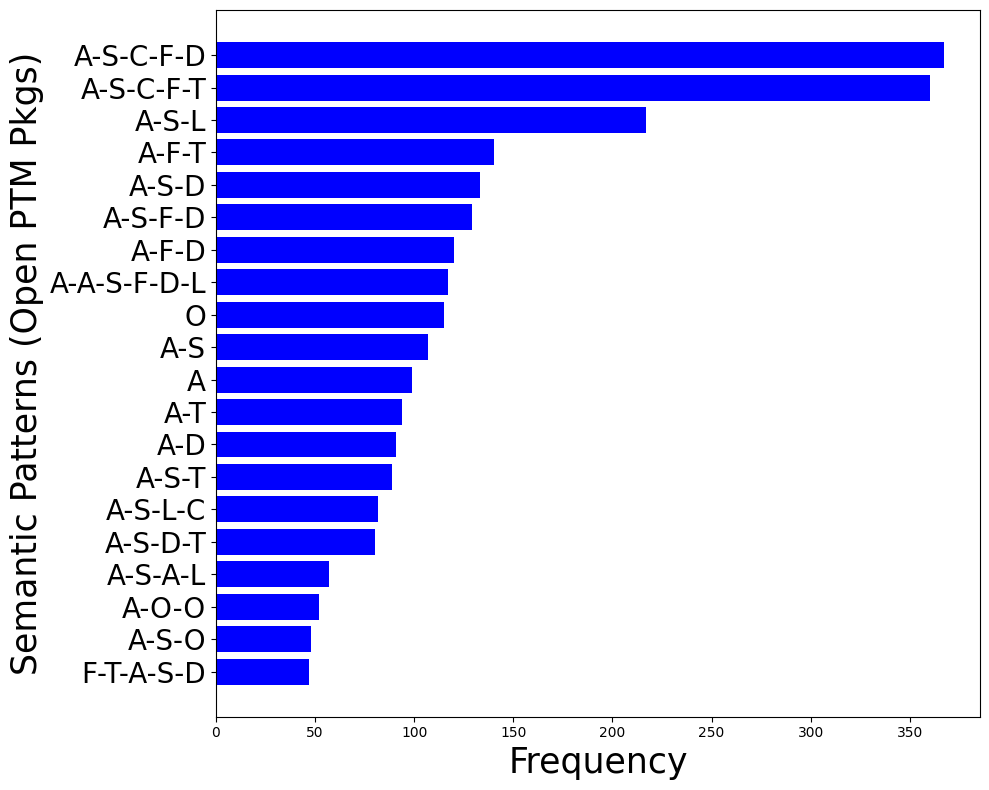

In [84]:

# Prepare data for plotting
labels = list(in_patterns.keys())
frequencies = list(in_patterns.values())

# Sort the data by frequency
sorted_idx = np.argsort(frequencies)[::-1]
labels = np.array(labels)[sorted_idx]
frequencies = np.array(frequencies)[sorted_idx]

# Create the histogram
plt.figure(figsize=(10, 8))
plt.barh(labels[:20][::-1], frequencies[:20][::-1], color='blue')
print(labels[:20])
# patterns = labels
plt.ylabel('Semantic Patterns (Open PTM Pkgs)', fontsize=25)
plt.xlabel('Frequency', fontsize=25)
# plt.title('Frequency of Semantic Naming Patterns', fontsize=14)
plt.yticks(rotation=0)  # Adjust y-axis label rotation if needed
plt.tick_params(axis='y', labelsize=20)  # Change the fontsize here
plt.tight_layout()  # Add this line

# plt.show()
plt.savefig("in_semantic_patterns.png", dpi=300)


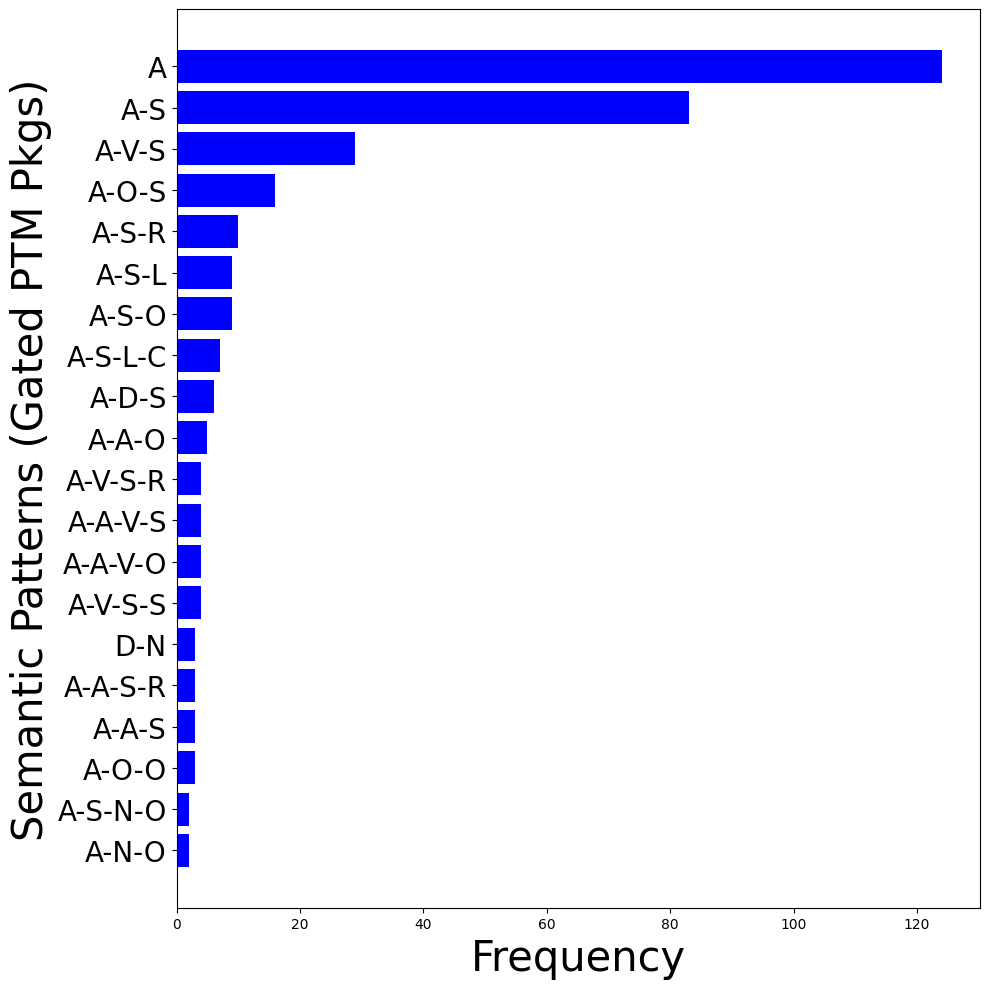

In [57]:

# Prepare data for plotting
labels = list(ex_patterns.keys())
frequencies = list(ex_patterns.values())

# Sort the data by frequency
sorted_idx = np.argsort(frequencies)[::-1]
labels = np.array(labels)[sorted_idx]
frequencies = np.array(frequencies)[sorted_idx]

# Create the histogram
plt.figure(figsize=(10, 10))
plt.barh(labels[:20][::-1], frequencies[:20][::-1], color='blue')  # Using barh instead of bar
plt.ylabel('Semantic Patterns (Gated PTM Pkgs)', fontsize=30)  # Swap xlabel with ylabel
plt.xlabel('Frequency', fontsize=30)  # Swap ylabel with xlabel
plt.yticks(rotation=0)  # Adjust y-axis label rotation if needed
plt.tick_params(axis='y', labelsize=20)  # Change the fontsize here
plt.tight_layout()  # Add this line
plt.savefig("ex_semantic_patterns.png")


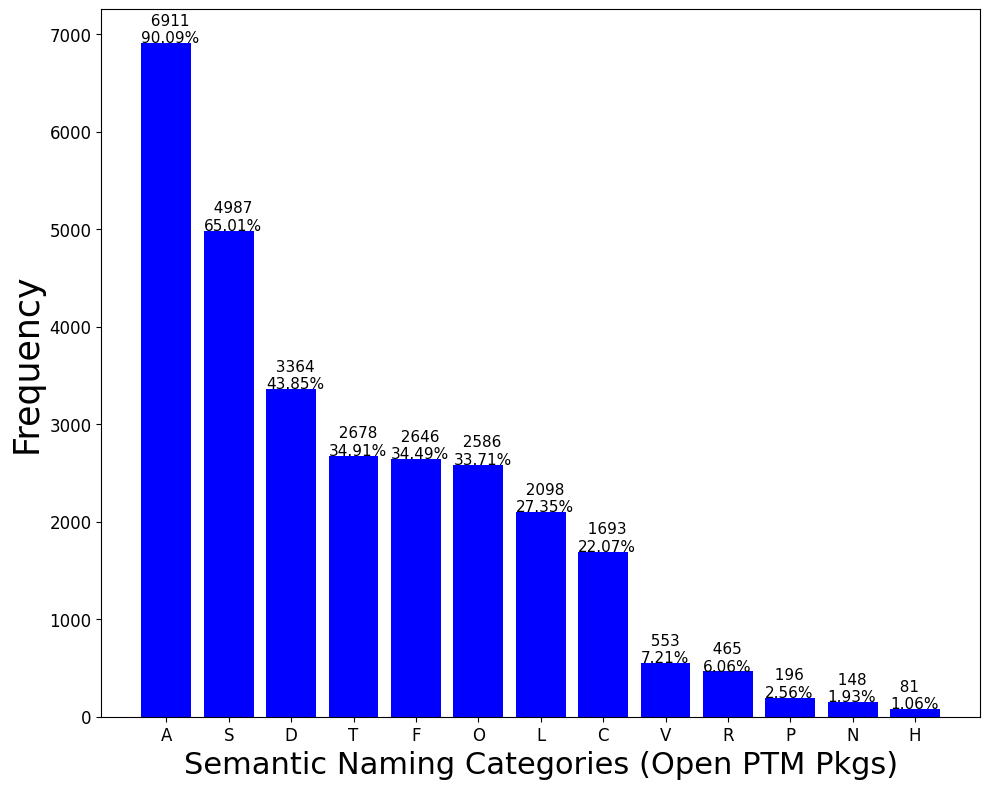

In [103]:
# Create tuple_categories from the original list of categories (cat_all)
set_categories = []
for ctg in cat_all:
    for c in set(ctg):
        set_categories.append(c)
# Convert to a set for unique categories and initialize their counts to 0
unique_categories = {ctg: 0 for ctg in set(set_categories)}
# Count the frequency of each unique category in the original list
for ctg in set_categories:
    unique_categories[ctg] += 1

total_count = len(in_data)

# Sort the dictionary by value (frequency)
plt.figure(figsize=(10, 8))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sorted_categories = sorted(unique_categories.items(), key=lambda x: x[1], reverse=True)

top_10_categories = sorted_categories[:30]
# Plot the histogram
bars = plt.bar(range(len(top_10_categories)), [val[1] for val in top_10_categories], color='blue', width=0.8)
plt.xticks(range(len(top_10_categories)), [val[0] for val in top_10_categories])
plt.xlabel("Semantic Naming Categories (Open PTM Pkgs)", fontsize=22)
plt.ylabel("Frequency", fontsize=25)

# Add text labels above each bar
for bar, (category, count) in zip(bars, top_10_categories):
    percentage = (count / total_count) * 100  # Calculate the percentage
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.4, bar.get_height() + 4.2,
             f"  {count}\n{percentage:.2f}%", fontsize=11)

# plt.title("Frequency of Categories", fontsize=20)
# plt.show()
plt.tight_layout()
plt.savefig("in_categories.png", dpi=300)

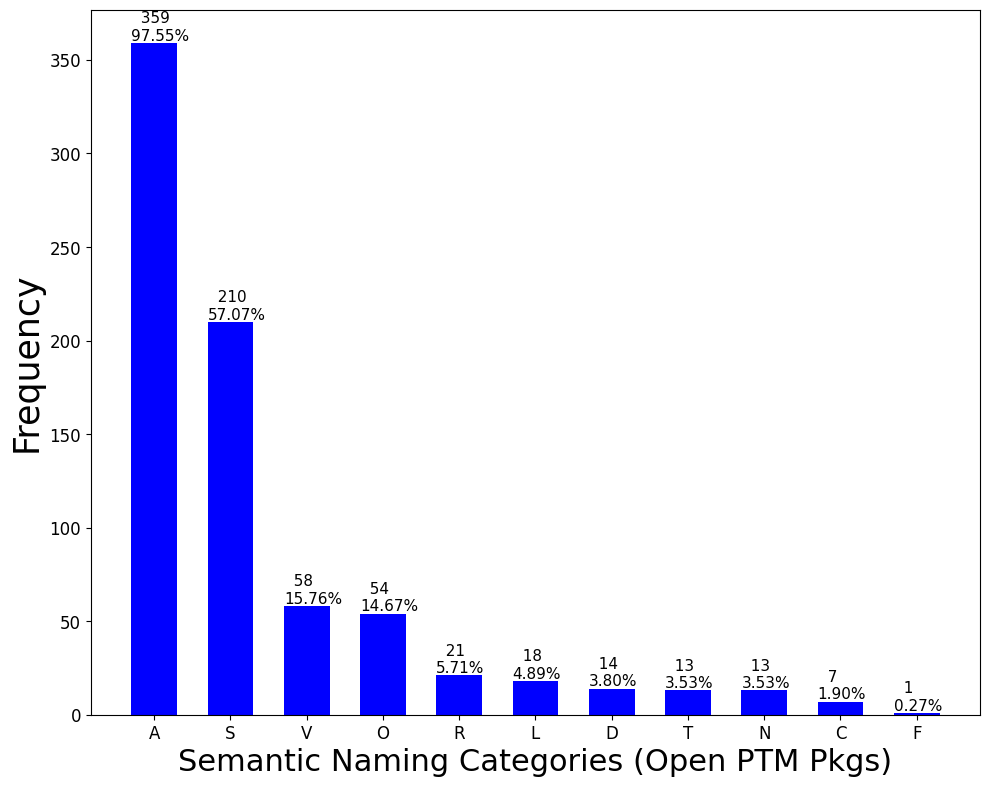

In [106]:
# Create tuple_categories from the original list of categories (cat_all)
set_categories = []
for ctg in cat_all:
    for c in set(ctg):
        set_categories.append(c)
# Convert to a set for unique categories and initialize their counts to 0
unique_categories = {ctg: 0 for ctg in set(set_categories)}
# Count the frequency of each unique category in the original list
for ctg in set_categories:
    unique_categories[ctg] += 1

total_count = len(ex_data)

# Sort the dictionary by value (frequency)
plt.figure(figsize=(10, 8))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sorted_categories = sorted(unique_categories.items(), key=lambda x: x[1], reverse=True)

top_10_categories = sorted_categories[:30]
# Plot the histogram
bars = plt.bar(range(len(top_10_categories)), [val[1] for val in top_10_categories], color='blue', width=0.6)
plt.xticks(range(len(top_10_categories)), [val[0] for val in top_10_categories])
plt.xlabel("Semantic Naming Categories (Open PTM Pkgs)", fontsize=22)
plt.ylabel("Frequency", fontsize=25)

# Add text labels above each bar
for bar, (category, count) in zip(bars, top_10_categories):
    percentage = (count / total_count) * 100  # Calculate the percentage
    plt.text(bar.get_x() + bar.get_width() / 2 -0.3, bar.get_height() + 1.5,
             f"  {count}\n{percentage:.2f}%", fontsize=11)

# plt.title("Frequency of Categories", fontsize=20)
# plt.show()
plt.tight_layout()
plt.savefig("ex_categories.png", dpi=300)

In [70]:
with open("filtered_models_nameDownload.json", "r") as f:
    filtered_models_downloads = json.load(f)


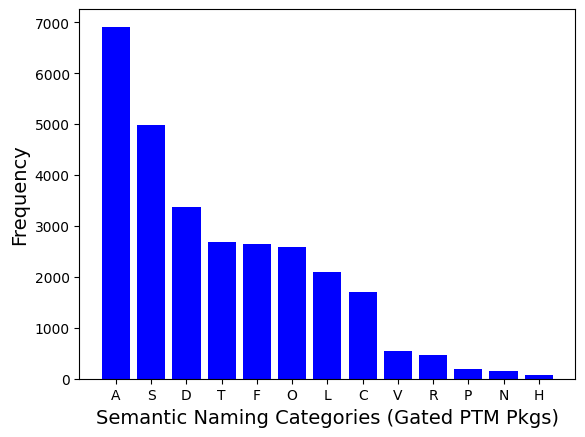

In [94]:
# Create tuple_categories from the original list of categories (cat_all)
set_categories = []
for ctg in cat_all:
    for c in set(ctg):
        set_categories.append(c)
# Convert to a set for unique categories and initialize their counts to 0
unique_categories = {ctg: 0 for ctg in set(set_categories)}
# Count the frequency of each unique category in the original list
for ctg in set_categories:
    unique_categories[ctg] += 1

# Sort the dictionary by value (frequency)

sorted_categories = sorted(unique_categories.items(), key=lambda x: x[1], reverse=True)

top_10_categories = sorted_categories[:30]
# Plot the histogram
plt.bar(range(len(top_10_categories)), [val[1] for val in top_10_categories], color='blue')
plt.xticks(range(len(top_10_categories)), [val[0] for val in top_10_categories])
plt.xlabel("Semantic Naming Categories (Gated PTM Pkgs)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# plt.title("Frequency of Categories", fontsize=20)
# plt.show()
plt.savefig("ex_categories.png", dpi=300)

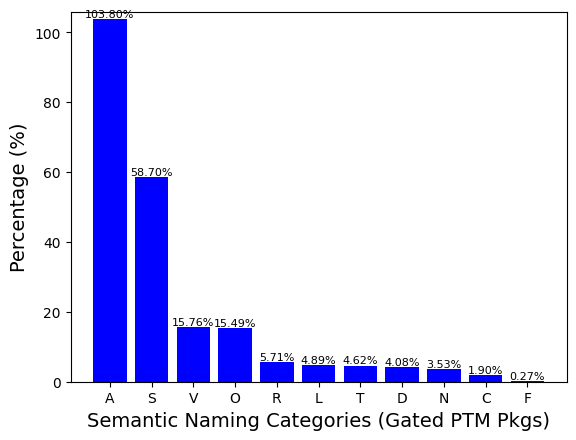

In [160]:
# Create tuple_categories from the original list of categories (cat_all)
set_categories = []
for ctg in cat_all:
    for c in ctg:
        set_categories.append(c)
# Convert to a set for unique categories and initialize their counts to 0
unique_categories = {ctg: 0 for ctg in set(set_categories)}
# Count the frequency of each unique category in the original list
for ctg in set_categories:
    unique_categories[ctg] += 1

# Sort the dictionary by value (frequency)

sorted_categories = sorted(unique_categories.items(), key=lambda x: x[1], reverse=True)

total_frequency = sum(val[1] for val in sorted_categories)
top_10_categories = sorted_categories[:30]

# Convert frequency to percentage
percentage_categories = [(cat, (freq / len(ex_data)) * 100) for cat, freq in top_10_categories]

# Create the bar chart
plt.bar(range(len(percentage_categories)), [val[1] for val in percentage_categories], color='blue')

# Annotate each bar with its percentage
for i, (category, percentage) in enumerate(percentage_categories):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center', fontsize=8)  # Adjust position and font size here

# Add x-axis and y-axis labels
plt.xticks(range(len(percentage_categories)), [val[0] for val in percentage_categories])
plt.xlabel("Semantic Naming Categories (Gated PTM Pkgs)", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

# Optionally, set y-axis limits to make percentages easier to understand
plt.ylim(0, max([val[1] for val in percentage_categories]) + 2)  # +2 to give space for annotations

# Save the figure
plt.savefig("in_categories_with_percentages.png", dpi=300)

In [106]:
model_to_pattern = {}
for model, info in in_data.items():
    categories = []
    confidences = []
    # Get the tuples
    for component in info:
        # Get the top1 category and conf
        try:
            cat = info[component][0][0]
            conf = info[component][0][1]
        except:
            # logger.warning("No category found for {}".format(model)) 
            # logger.debug(f"model components: {components}")
            continue
        categories.append(cat)
        confidences.append(conf)    
    # Generate a pattern based on categories
    pattern = "-".join(categories)
    model_to_pattern[model] = pattern


In [107]:
model_to_pattern

{'l3cube-pune/marathi-albert': 'L-A',
 'sibt-rj/albert-large-urdu': 'A-S-L',
 'albert-large-v1': 'A-S-V',
 'albert-base-v1': 'A-S-V',
 'albert-xxlarge-v1': 'A-S-V',
 'albert-xxlarge-v2': 'A-S-V',
 'asafaya/albert-base-arabic': 'A-S-L',
 'albert-xlarge-v2': 'A-S-V',
 'albert-xlarge-v1': 'A-S-V',
 'SauravMaheshkar/clr-finetuned-albert-base': 'O-F-A-S',
 'asafaya/albert-large-arabic': 'A-S-L',
 'asafaya/albert-xlarge-arabic': 'A-S-L',
 'SauravMaheshkar/clr-finetuned-albert-large': 'O-F-A-S',
 'albert-base-v2': 'A-S-V',
 'uer/albert-large-chinese-cluecorpussmall': 'A-S-L-D',
 'abhilash1910/albert-german-ner': 'A-L-T',
 'uer/albert-base-chinese-cluecorpussmall': 'A-S-L-D',
 'qwant/fralbert-base': 'A-S',
 'l3cube-pune/marathi-albert-v2': 'L-A-V',
 'SauravMaheshkar/clr-pretrained-albert-base': 'O-R-A-S',
 'albert-large-v2': 'A-S-V',
 'ibraheemmoosa/xlmindic-base-uniscript': 'A-S-C',
 'zanelim/singbert-lite-sg': 'A-S-L',
 'ibraheemmoosa/xlmindic-base-multiscript': 'A-S-C',
 'dccuchile/albert-t

In [108]:
avg_downloads

{'L-A': 0,
 'A-S-L': 0,
 'A-S-V': 0,
 'O-F-A-S': 0,
 'A-S-L-D': 0,
 'A-L-T': 0,
 'A-S': 0,
 'L-A-V': 0,
 'O-R-A-S': 0,
 'A-S-C': 0,
 'A': 0,
 'O-O': 0,
 'A-S-V-F-T': 0,
 'A-T-V': 0,
 'A-S-O-T': 0,
 'A-S-V-T-D-T-O': 0,
 'A-S-V-F-T-O-O': 0,
 'A-S-V-F-D-O-O': 0,
 'A-S-V-F-D': 0,
 'A-D-V-D-T-O': 0,
 'A-S-V-R': 0,
 'A-S-V-D': 0,
 'A-L-S-T': 0,
 'S-A-T-L': 0,
 'A-S-O-O': 0,
 'A-S-V-D-O-R': 0,
 'A-S-O-O-D': 0,
 'O-A-D-L': 0,
 'A-S-O': 0,
 'D-A-O': 0,
 'A-S-S-V-D': 0,
 'A-S-D': 0,
 'A-D-T-O-O': 0,
 'A-A-O': 0,
 'A-F-O': 0,
 'L': 0,
 'A-D-O': 0,
 'O-A-O': 0,
 'A-D': 0,
 'T': 0,
 'A-D-O-O': 0,
 'T-A-S-V-D': 0,
 'A-T': 0,
 'T-A-S-V': 0,
 'A-R-D-D': 0,
 'A-O-D-D-O-D': 0,
 'A-R-D': 0,
 'A-S-F-S-F-D-T-R': 0,
 'A-S-T-R-D-T': 0,
 'A-A-S-F-D': 0,
 'T-O-A-S-O': 0,
 'A-D-T-O': 0,
 'A-F-A-S': 0,
 'A-S-T': 0,
 'A-T-O-O': 0,
 'A-S-F-T-A-V': 0,
 'A-T-T-T': 0,
 'A-S-D-O': 0,
 'A-O-R-T': 0,
 'A-T-T': 0,
 'A-S-D-T': 0,
 'A-S-A-S-T-R': 0,
 'A-S-T-D-T': 0,
 'A-T-T-O': 0,
 'A-S-A-F-D': 0,
 'A-A-S-D': 0,
 'A-S-F-D'

In [95]:
# Initialize avg_downloads dictionary

avg_downloads = {pattern: 0 for pattern in in_patterns.keys()}

# Initialize a counter for each pattern to keep track of the number of models
pattern_counter = {pattern: 0 for pattern in in_patterns.keys()}


In [97]:
# Iterate over each architecture and its models
for architecture, model_data in filtered_models_downloads.items():
    for i in range(len(model_data)):
        model_name, download_count = model_data[i][0], model_data[i][1]
        # Use the model_to_pattern dictionary to find the pattern corresponding to this model_name
        pattern = model_to_pattern.get(model_name)
        if pattern is None:
            continue  # Skip if this model_name doesn't have an associated pattern
        avg_downloads[pattern] += download_count
        pattern_counter[pattern] += 1

# Calculate average downloads
for pattern in in_patterns.keys():
    if pattern_counter[pattern] > 0:
        avg_downloads[pattern] /= pattern_counter[pattern]
    else:
        print(f"No models found for pattern {pattern}")

print("Average Downloads by Pattern:")
print(avg_downloads)

No models found for pattern L-A
No models found for pattern A-S-L
No models found for pattern A-S-V
No models found for pattern O-F-A-S
No models found for pattern A-S-L-D
No models found for pattern A-L-T
No models found for pattern A-S
No models found for pattern L-A-V
No models found for pattern O-R-A-S
No models found for pattern A-S-C
No models found for pattern A
No models found for pattern O-O
No models found for pattern A-S-V-F-T
No models found for pattern A-T-V
No models found for pattern A-S-O-T
No models found for pattern A-S-V-T-D-T-O
No models found for pattern A-S-V-F-T-O-O
No models found for pattern A-S-V-F-D-O-O
No models found for pattern A-S-V-F-D
No models found for pattern A-D-V-D-T-O
No models found for pattern A-S-V-R
No models found for pattern A-S-V-D
No models found for pattern A-L-S-T
No models found for pattern S-A-T-L
No models found for pattern A-S-O-O
No models found for pattern A-S-V-D-O-R
No models found for pattern A-S-O-O-D
No models found for patter

/tmp/ipykernel_17231/2011389823.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


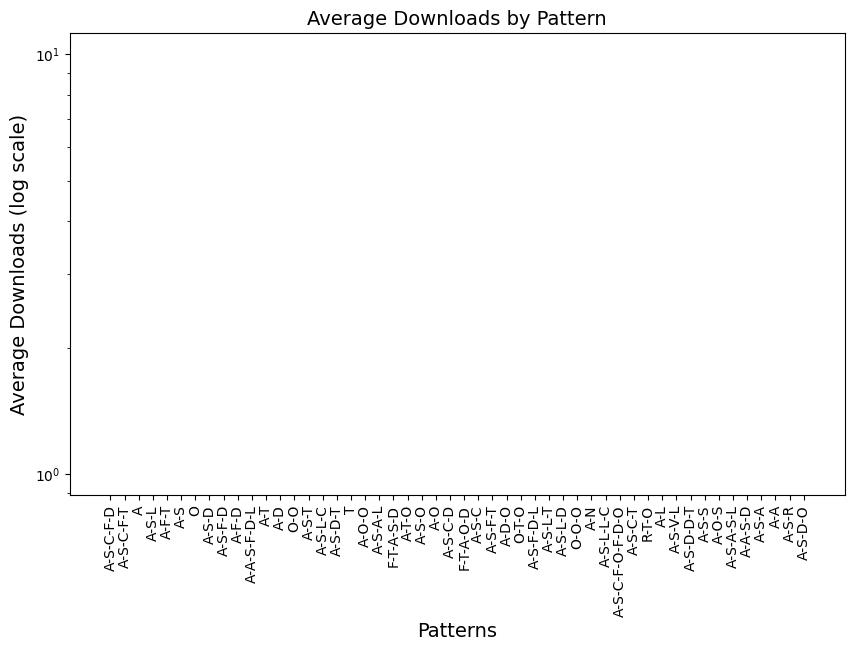

In [98]:
# Plot the average downloads in log scale for each pattern

plt.figure(figsize=(10, 6))

# Only get the top 20 patterns
# plt.bar(labels, avg_downloads.values(), color='blue')
plt.bar(labels[:50], [avg_downloads[pattern] for pattern in labels[:50]], color='blue')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Patterns', fontsize=14)
plt.ylabel('Average Downloads (log scale)', fontsize=14)
plt.title('Average Downloads by Pattern', fontsize=14)
plt.show()



defaultdict(<class 'list'>, {2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/tmp/ipykernel_17231/1505025287.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


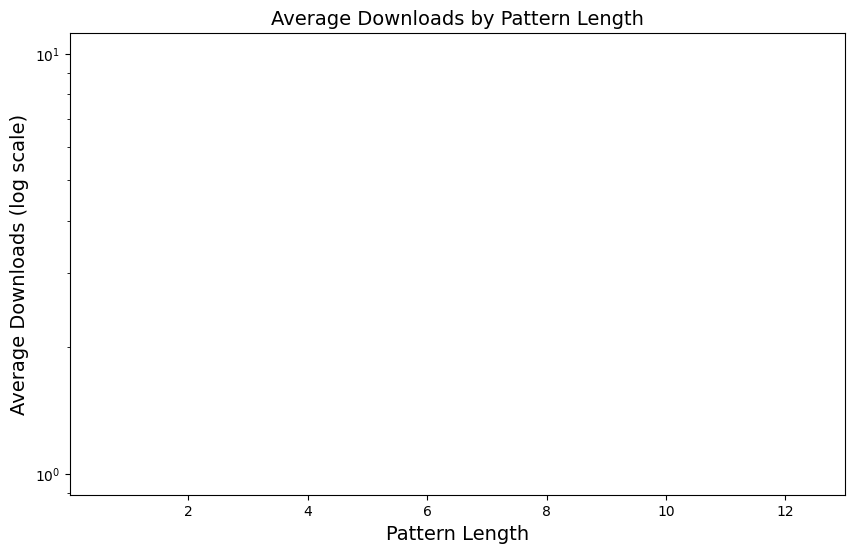

In [109]:
from collections import defaultdict
# Create a dictionary to hold average downloads by pattern length
avg_downloads_by_length = defaultdict(list)

for pattern, avg_download in avg_downloads.items():
    pattern_length = len(pattern.split('-'))
    avg_downloads_by_length[pattern_length].append(avg_download)
print(avg_downloads_by_length)
# Calculate the average downloads for each pattern length
for length, downloads in avg_downloads_by_length.items():
    avg_downloads_by_length[length] = np.mean(downloads)

# Sort the lengths for plotting
sorted_lengths = sorted(avg_downloads_by_length.keys())

# Prepare data for plotting
x_data = sorted_lengths
y_data = [avg_downloads_by_length[length] for length in sorted_lengths]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x_data, y_data, color='blue')
plt.yscale('log')
plt.xlabel('Pattern Length', fontsize=14)
plt.ylabel('Average Downloads (log scale)', fontsize=14)
plt.title('Average Downloads by Pattern Length', fontsize=14)
plt.show()

In [110]:
avg_downloads_by_length

defaultdict(list,
            {2: 0.0,
             3: 0.0,
             4: 0.0,
             1: 0.0,
             5: 0.0,
             7: 0.0,
             6: 0.0,
             8: 0.0,
             11: 0.0,
             9: 0.0,
             10: 0.0,
             12: 0.0})

/tmp/ipykernel_17231/2045089844.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


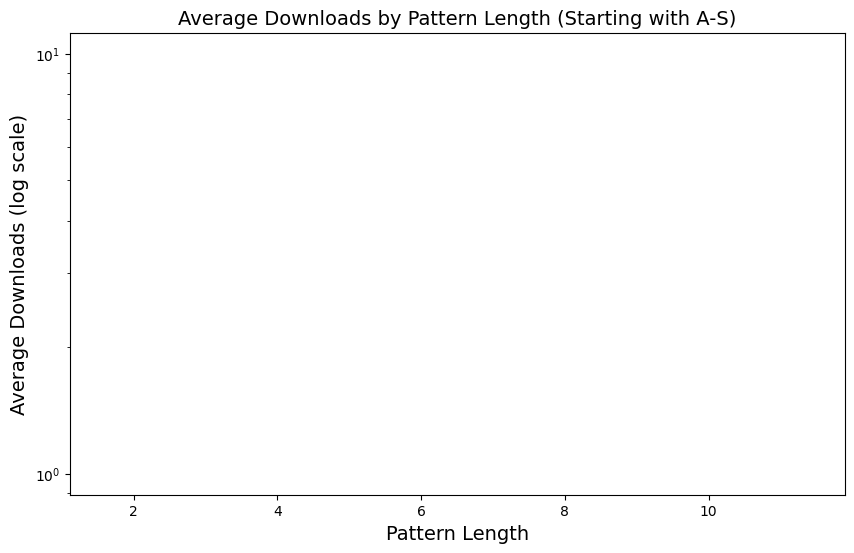

In [111]:
# Create a dictionary to hold average downloads by pattern length, but only for patterns starting with 'A'
avg_downloads_by_length = defaultdict(list)

for pattern, avg_download in avg_downloads.items():
    if pattern.startswith('A'):
        pattern_length = len(pattern.split('-'))
        if pattern.startswith('A-S'):
            avg_downloads_by_length[pattern_length].append(avg_download)

# Calculate the average downloads for each pattern length
for length, downloads in avg_downloads_by_length.items():
    avg_downloads_by_length[length] = np.mean(downloads)

# Sort the lengths for plotting
sorted_lengths = sorted(avg_downloads_by_length.keys())

# Prepare data for plotting
x_data = sorted_lengths
y_data = [avg_downloads_by_length[length] for length in sorted_lengths]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x_data, y_data, color='blue')
plt.yscale('log')
plt.xlabel('Pattern Length', fontsize=14)
plt.ylabel('Average Downloads (log scale)', fontsize=14)
plt.title('Average Downloads by Pattern Length (Starting with A-S)', fontsize=14)
plt.show()

/tmp/ipykernel_17231/1322791431.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


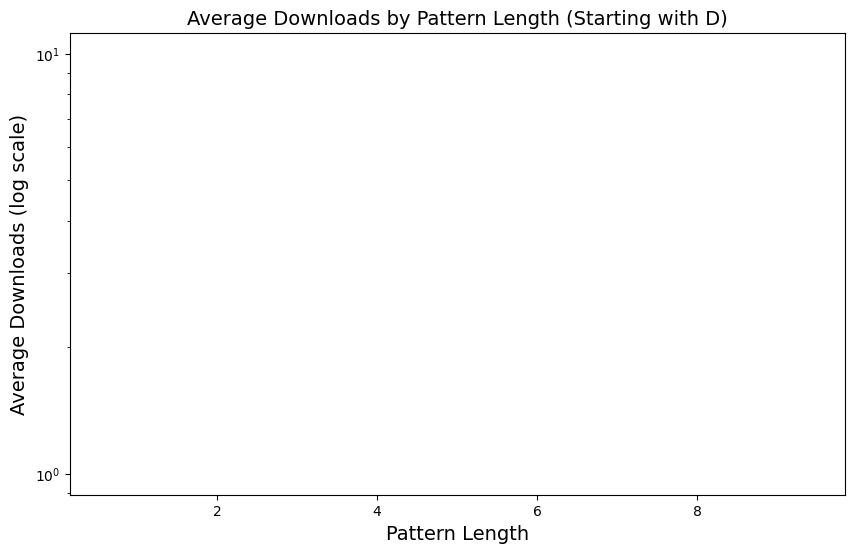

In [112]:
# Create a dictionary to hold average downloads by pattern length, but only for patterns starting with 'A'
avg_downloads_by_length = defaultdict(list)

for pattern, avg_download in avg_downloads.items():
    if pattern.startswith('D'):
        pattern_length = len(pattern.split('-'))
        # if pattern.startswith('A-F'):
        avg_downloads_by_length[pattern_length].append(avg_download)

# Calculate the average downloads for each pattern length
for length, downloads in avg_downloads_by_length.items():
    avg_downloads_by_length[length] = np.mean(downloads)

# Sort the lengths for plotting
sorted_lengths = sorted(avg_downloads_by_length.keys())

# Prepare data for plotting
x_data = sorted_lengths
y_data = [avg_downloads_by_length[length] for length in sorted_lengths]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x_data, y_data, color='blue')
plt.yscale('log')
plt.xlabel('Pattern Length', fontsize=14)
plt.ylabel('Average Downloads (log scale)', fontsize=14)
plt.title('Average Downloads by Pattern Length (Starting with D)', fontsize=14)
plt.show()

In [113]:
# sort the patterns by frequencies
sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)

# get the top 20 patterns, only patterns, not frequencies
top_20_patterns = [pattern[0] for pattern in sorted_patterns[:50]]
top_20_patterns

['A',
 'A-S',
 'A-V-S',
 'A-O-S',
 'A-S-R',
 'A-S-O',
 'A-S-L',
 'A-S-L-C',
 'A-D-S',
 'A-A-O',
 'A-V-S-S',
 'A-V-S-R',
 'A-A-V-S',
 'A-A-V-O',
 'D-N',
 'A-A-S-R',
 'A-A-S',
 'A-O-O',
 'A-V-N-O',
 'A-V-N',
 'A-N-O',
 'A-S-N-O',
 'T-A',
 'A-O',
 'T-O-S',
 'V-A-S',
 'D',
 'A-A-V-S-R',
 'A-A',
 'A-T',
 'O-A-V',
 'A-N',
 'A-S-N',
 'A-O-V-S',
 'A-T-O-S',
 'A-S-L-D-D',
 'T-D-S-R',
 'T-D-S',
 'V-A-S-R',
 'S-A-S',
 'A-T-S',
 'A-T-O-T-T-S',
 'A-T-T-S',
 'A-S-S',
 'A-T-T-O-S',
 'F-A-S-O',
 'A-V-S-L']

In [116]:
# If pattern is A-A-S-F-D-L, store it in a list. Get the patterns from model_to_pattern
pattern_to_models = {pattern: [] for pattern in in_patterns}
for model, pattern in model_to_pattern.items():
    pattern_to_models[pattern].append(model)


In [117]:
pattern_to_models["A-S-C-F-D"]

['egumasa/bert-base-uncased-finetuned-academic',
 'mayankb96/bert-base-uncased-finetuned-lexglue',
 'lewtun/bert-base-uncased-finetuned-imdb',
 'MrRobb/spanbert-large-cased-finetuned-squad',
 'negfir/distilbert-base-uncased-finetuned-squad',
 'monakth/bert-base-uncased-finetuned-squad',
 'SupriyaArun/bert-base-uncased-finetuned-squad',
 'andresestevez/bert-base-cased-finetuned-squad',
 'srmukundb/bert-base-uncased-finetuned-squad',
 'Tianle/bert-base-uncased-finetuned-squad',
 'baru98/bert-base-cased-finetuned-squad',
 'victoraavila/bert-base-uncased-finetuned-squad',
 'ss756/bert-base-cased-finetuned-squad',
 'SreyanG-NVIDIA/bert-base-cased-finetuned-squad',
 'FabianWillner/bert-base-uncased-finetuned-squad',
 'mirbostani/bert-base-uncased-finetuned-newsqa',
 'victorlee071200/bert-base-cased-finetuned-squad_v2',
 'Seongkyu/bert-base-cased-finetuned-squad',
 'monakth/bert-base-cased-finetuned-squadv2',
 'SummerZhang/bert-base-uncased-finetuned-squad',
 'bdickson/bert-base-uncased-finet